


# Import libraries and Dataset





In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Enable inline plotting
%matplotlib inline


# Load the CSV file
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




# 1.Generate summary statistics (mean, median, std)






In [5]:
df.describe()

# Mean, Median, Std for all numeric columns
print("Mean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))
print("\nStandard Deviation:\n", df.std(numeric_only=True))

Mean:
 PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

Median:
 PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

Standard Deviation:
 PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64





# 2.Create histograms and boxplots for numeric features





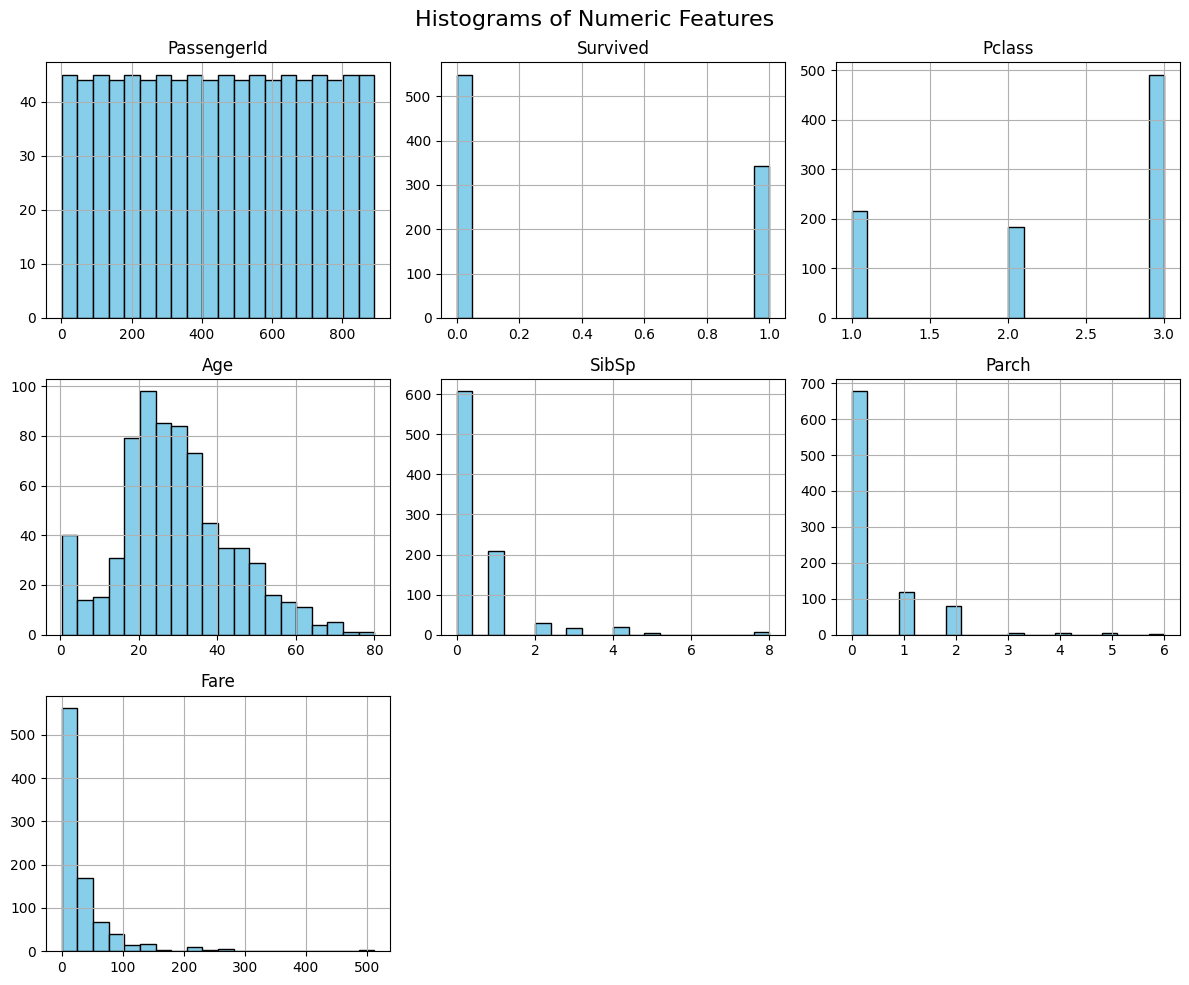

In [7]:
#HISTOGRAMS
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(12, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()



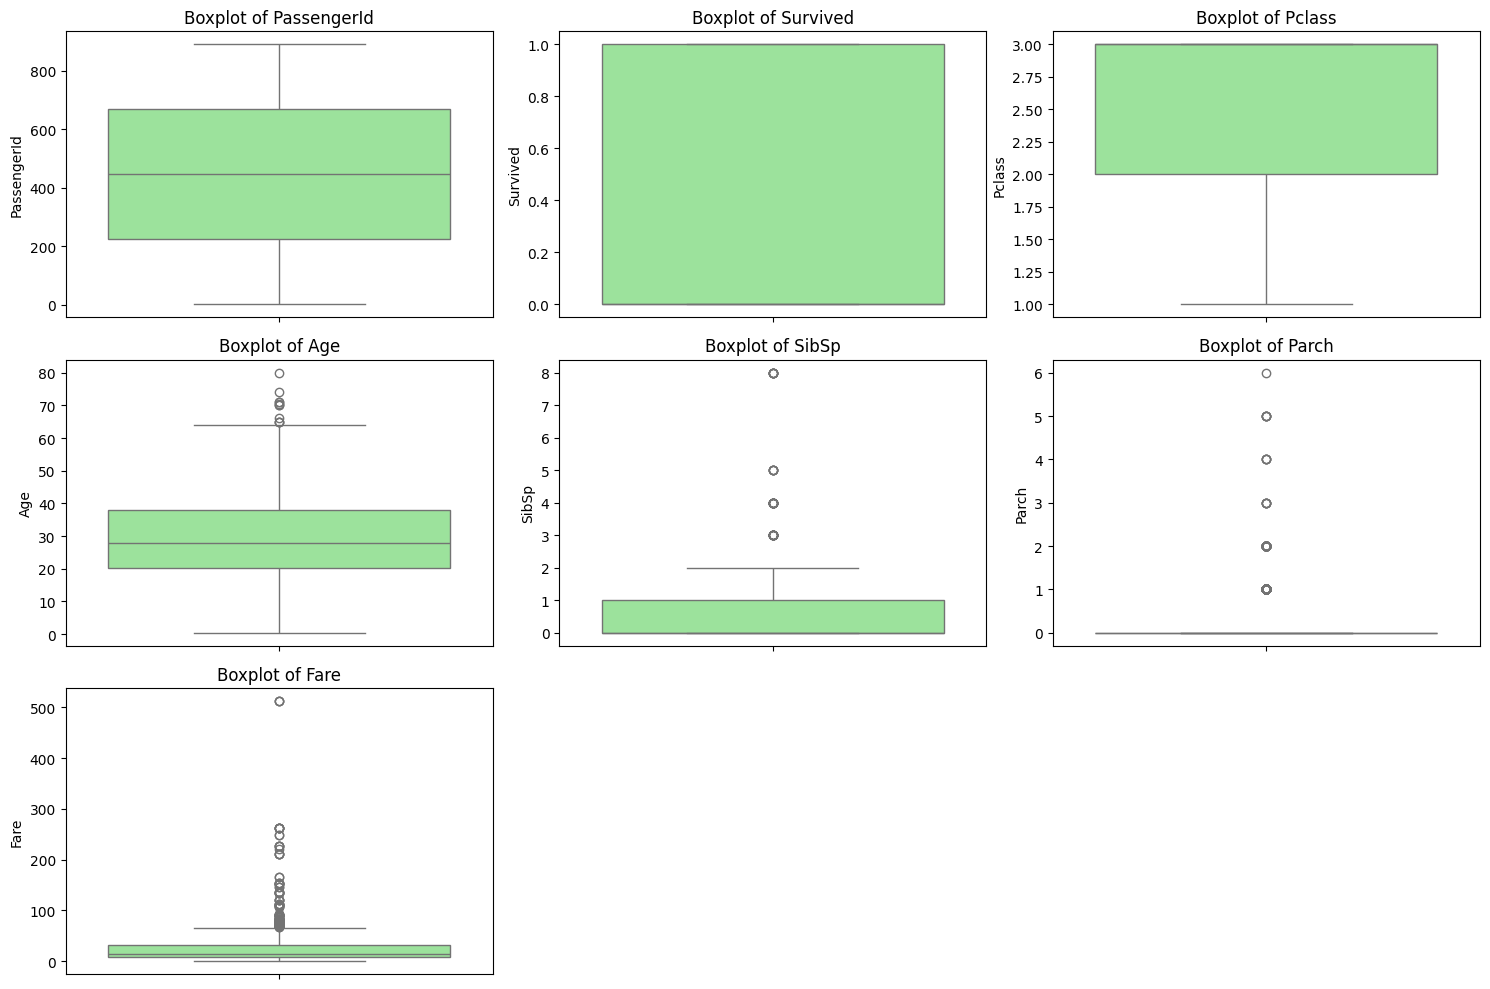

In [8]:
# Boxplots
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()




**
# 3.Use pairplot/correlation matrix for feature relationships.**



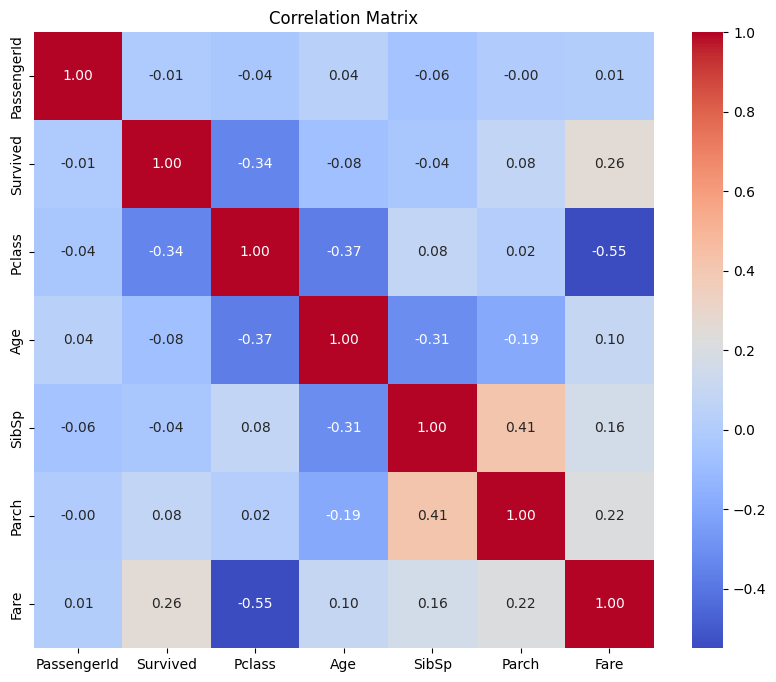

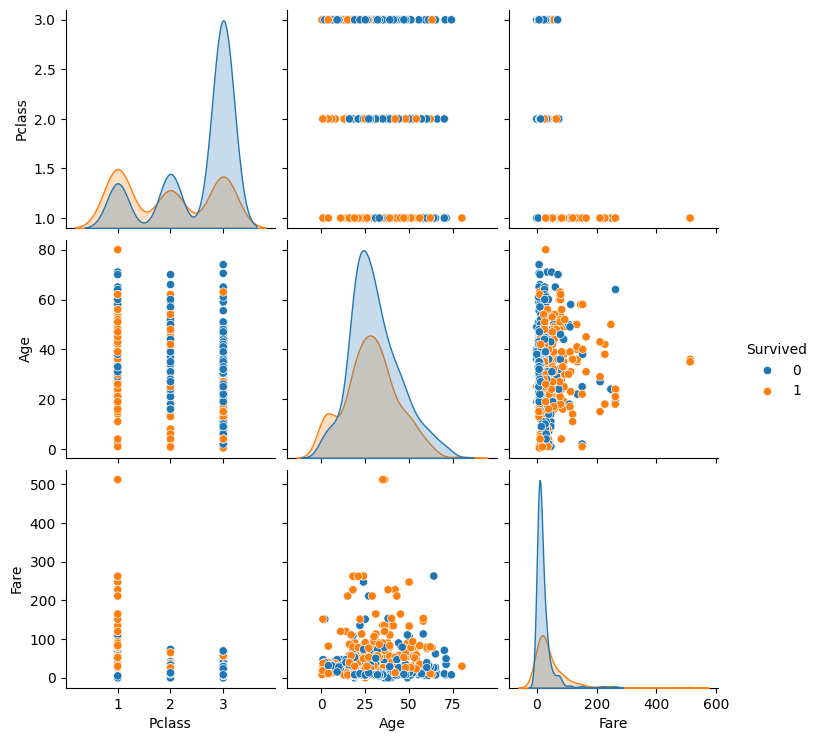

In [10]:
# Correlation Matrix
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

# Pairplot for key features
sns.pairplot(df[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')



# 4.Identify patterns, trends, or anomalies in the data



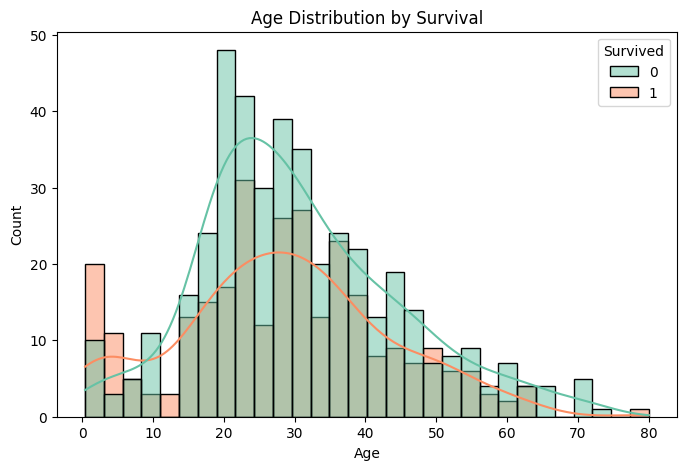

In [11]:
# Age vs Survived
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=30, kde=True, palette='Set2')
plt.title("Age Distribution by Survival")
plt.show()

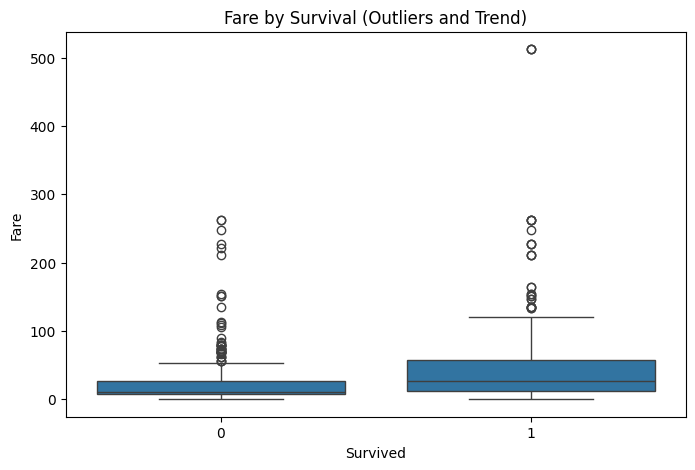

In [12]:
# Fare anomalies
plt.figure(figsize=(8, 5))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Fare by Survival (Outliers and Trend)")
plt.show()




# 5.Make basic feature-level inferences from visuals




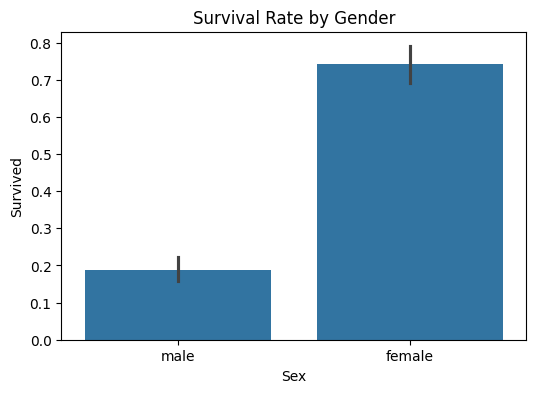

In [13]:
# Survival rate by gender
plt.figure(figsize=(6, 4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title("Survival Rate by Gender")
plt.show()

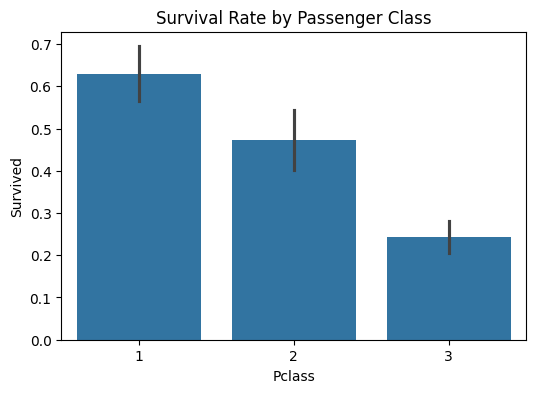

In [14]:
# Survival by Passenger Class
plt.figure(figsize=(6, 4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()